In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\Mandar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\externals\__init__.py)

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [5]:
#Creating X and Y variable

x = df.drop('Churn', axis = 1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [6]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### SMOTEENN

In [8]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

# Decision Tree Classifier

In [9]:
model_dt = DecisionTreeClassifier(criterion= 'gini', random_state = 100, max_depth=6, min_samples_leaf = 8)

In [10]:
model_dt.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [11]:
yr_pred = model_dt.predict(xr_test)

In [12]:
yr_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

### Precision, Recall, F1-Score (Decision Tree)

In [13]:
print(classification_report(yr_test, yr_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       566
           1       0.90      0.94      0.92       597

    accuracy                           0.92      1163
   macro avg       0.92      0.92      0.92      1163
weighted avg       0.92      0.92      0.92      1163



### Confusion Matrix (Decision Tree)

In [14]:
print(confusion_matrix(yr_test, yr_pred))

[[504  62]
 [ 35 562]]


### Score (Decision Tree)

In [15]:
model_dt.score(xr_test, yr_test)

0.9165950128976784

# Neural Network

In [18]:
import tensorflow as tf

In [19]:
xnn_train, xnn_temp, ynn_train, ynn_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [20]:
xnn_val, xnn_test, ynn_val, ynn_test = train_test_split(xnn_temp, ynn_temp, test_size=0.5, random_state=42)

In [21]:
num_input_features = len(xnn_train.columns)
num_input_features

50

In [25]:
print(xnn_train.columns)

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessB

In [20]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(num_input_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model_nn.fit(x = xnn_train, y = ynn_train, epochs = 40, batch_size=32, validation_split=0.2)

Epoch 1/40


103/103 [==============================] - 1s 4ms/step - loss: 13.7414 - accuracy: 0.7024 - val_loss: 4.5296 - val_accuracy: 0.7442
Epoch 2/40
103/103 [==============================] - 0s 2ms/step - loss: 2.7484 - accuracy: 0.7837 - val_loss: 1.6369 - val_accuracy: 0.8558
Epoch 3/40
103/103 [==============================] - 0s 2ms/step - loss: 1.5163 - accuracy: 0.8328 - val_loss: 1.9671 - val_accuracy: 0.8461
Epoch 4/40
103/103 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.8629 - val_loss: 0.6743 - val_accuracy: 0.8206
Epoch 5/40
103/103 [==============================] - 0s 2ms/step - loss: 1.1260 - accuracy: 0.8607 - val_loss: 0.2645 - val_accuracy: 0.9285
Epoch 6/40
103/103 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.8796 - val_loss: 0.7730 - val_accuracy: 0.8727
Epoch 7/40
103/103 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.8777 - val_loss: 0.5344 - val_accuracy: 0.8606
Epo

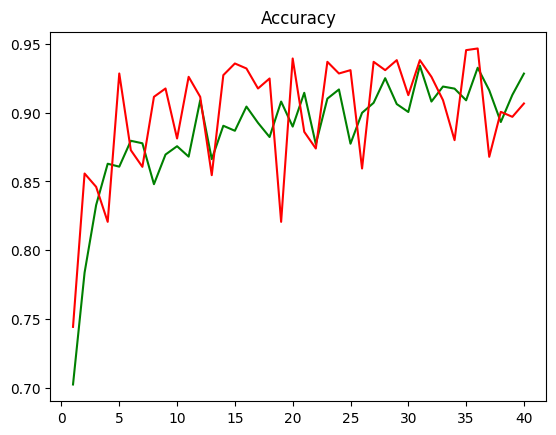

In [23]:
epochs = range(1, 41)
plt.plot(epochs, history.history['accuracy'], 'g', label = 'Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label = 'val accuracy')
plt.title('Accuracy')
plt.show()

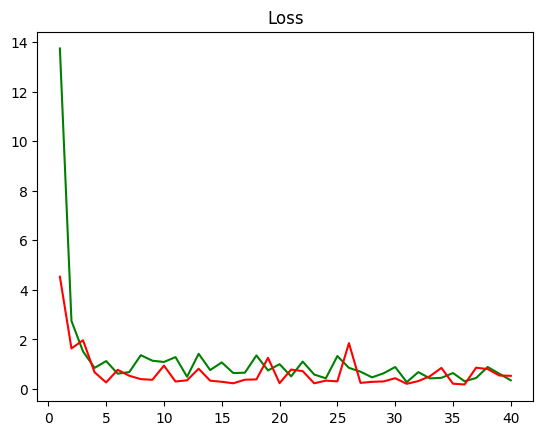

In [24]:
epochs = range(1, 41)
plt.plot(epochs, history.history['loss'], 'g', label = 'Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r', label = 'Val Loss')
plt.title('Loss')
plt.show()

In [25]:
nn_loss, nn_accuracy = model_nn.evaluate(xnn_test, ynn_test)

28/28 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.8857


In [40]:
nn_pred = model_nn.predict(xnn_test)

28/28 [==============================] - 0s 2ms/step


In [27]:
ynn_pred = np.round(nn_pred)

In [28]:
nn_conf_matrix = confusion_matrix(ynn_test, ynn_pred)

### Confusion Matrix (Neural Network)

In [29]:
print(nn_conf_matrix)

[[404   8]
 [ 93 379]]


### Precision, Recall, F1-Score (Neural Network)

In [30]:
print(classification_report(ynn_test, ynn_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       412
           1       0.98      0.80      0.88       472

    accuracy                           0.89       884
   macro avg       0.90      0.89      0.89       884
weighted avg       0.90      0.89      0.89       884



### Accuracy (Neural Network)

In [31]:
print(nn_accuracy)

0.8857465982437134


Export Model

In [39]:
model_nn.save(filepath="C:/Users/Mandar/Desktop/Projects/Customer-Churn-ML/neuralnet_model.h5", save_format="h5")